In [1]:
import pandas as pd

In [2]:
df_re = pd.read_csv('../data/minedex/ResourceEstimates.csv')
df_re.head()

,SiteCode,ShortTitle,ResourceCode,StartDate,EndDate,ReportingStandard,JORCCategory,JORCStatus,IN_TOTAL_FLAG,In Total Type,...,ContainedMetal,ContainedMetalUnit,CutOffGrade,CutOffGradeUnit,HeavyMineralPct,TargetCommodityGroup,Site_MineralizationStyle,Site_SecondaryMineralizationStyle,Resource_MineralizationStyle,Resource_SecondaryMineralizationStyle
0,S0000001,Pieces of Eight,1,13/07/2005,14/09/2006,Unknown,Resource,Inferred,No,Not in Total,...,903.50,kilogram,NaN,gram/tonne,NaN,GOLD,Vein and hydrothermal - undivided,Unknown/Unassigned,Unknown/Unassigned,Unknown/Unassigned
1,S0000002,Albury Heath,2,30/06/1999,01/10/2003,Unknown,Resource,Indicated,No,Not in Total,...,379.48,kilogram,NaN,gram/tonne,NaN,GOLD,Vein and hydrothermal - undivided,Au in shears or faults,Unknown/Unassigned,Au in shears or faults
2,S0000002,Albury Heath,3,04/06/2003,06/02/2017,Unknown,Resource,Measured,Yes,Resources,...,108.16,kilogram,NaN,gram/tonne,NaN,GOLD,Vein and hydrothermal - undivided,Au in shears or faults,Unknown/Unassigned,Unknown/Unassigned
3,S0000002,Albury Heath,4,04/06/2003,06/02/2017,Unknown,Resource,Indicated,Yes,Resources,...,361.68,kilogram,NaN,gram/tonne,NaN,GOLD,Vein and hydrothermal - undivided,Au in shears or faults,Unknown/Unassigned,Unknown/Unassigned
4,S0000002,Albury Heath,28452,07/02/2017,11/03/2019,"JORC (Australia, version unknown)",Resource,Indicated,Yes,Resources,...,675.00,kilogram,0.5,gram/tonne,NaN,GOLD,Vein and hydrothermal - undivided,Au in shears or faults,Unknown/Unassigned,Unknown/Unassigned


### SiteMineralization

In [3]:
df_mi = pd.read_csv('../data/minedex/SiteMineralization.csv')
# df_mi['MineralizationStyle'].unique()


 ·      Cobalt associated with nickel (and copper) in so-called orthomagmatic (igneous) mafic to ultramafic volcanic (komatiite)-hosted and intrusion-hosted deposits

In [9]:
df_mi['MineralizationStyle'].unique()

array(['Vein and hydrothermal - undivided',
       'Regolith - residual and supergene', 'Unknown/Unassigned',
       'Regolith - residual to eluvial placers',
       'Stratabound sedimentary - clastic-hosted',
       'Regolith - alluvial to beach placers',
       'Stratabound volcanic and sedimentary - volcanic-hosted sulfide',
       'Regolith - calcrete', 'Pegmatitic',
       'Sedimentary - banded iron-formation (taconite)',
       'Stratabound volcanic and sedimentary - volcanic oxide',
       'Orthomagmatic mafic and ultramafic - layered mafic intrusions',
       'Sedimentary - banded iron-formation (supergene enriched)',
       'Orthomagmatic mafic and ultramafic - komatiitic or dunitic',
       'Sedimentary - undivided',
       'Stratabound sedimentary - carbonate-hosted',
       'Stratabound volcanic and sedimentary - sedimentary-hosted sulfide',
       'Kimberlite and lamproite intrusions',
       'Carbonatite and alkaline igneous intrusions',
       'Orthomagmatic mafic and ul

### Filter by Orthomagmatic

In [13]:
orth_deposits = ['Orthomagmatic mafic and ultramafic - layered mafic intrusions', \
        'Orthomagmatic mafic and ultramafic - komatiitic or dunitic']

df_mi = df_mi[df_mi['MineralizationStyle'].isin(orth_deposits)]

In [14]:
df_re = df_re.merge(df_mi[['SiteCode', 'MineralizationStyle']])
# df_re.head()

In [16]:
df_re = df_re[['SiteCode', 'StartDate', 'EndDate', 'ResourceCode', 'ShortTitle',
               'JORCCategory', 'Tonnage (Mt)', 'CommodityName', 'ContainedMetal',
               'TargetCommodityGroup', 'MineralizationStyle']]

df_re.head(2)

,SiteCode,StartDate,EndDate,ResourceCode,ShortTitle,JORCCategory,Tonnage (Mt),CommodityName,ContainedMetal,TargetCommodityGroup,MineralizationStyle
0,S0001197,31/12/1973,31/12/2017,1810,Byro East,Resource,0.100,Nickel,1.400,NICKEL,Orthomagmatic mafic and ultramafic - layered m...
1,S0001204,30/06/1997,01/06/2001,1816,Carr Boyd Rocks,Resource,0.313,Copper,1.565,NICKEL,Orthomagmatic mafic and ultramafic - layered m...


In [18]:
df_re.ShortTitle.value_counts()[:3]

Panton      225
Leinster    151
Mt Keith    130
Name: ShortTitle, dtype: int64

In [23]:
df_re['CommodityName'].value_counts()[:3]

Nickel                681
Copper                188
Vanadium pentoxide    157
Name: CommodityName, dtype: int64

In [24]:
df_re_just_nickel = df_re[df_re['CommodityName'] == 'Nickel']
df_re_just_nickel.head(2)
print(df_re_just_nickel.shape)

(681, 11)


In [28]:
sites_with_nickel = df_re_just_nickel.SiteCode.unique()

In [29]:
df_re_with_nickel = df_re[df_re['SiteCode'].isin(sites_with_nickel)]

In [31]:
df_re_with_nickel.head(2)

,SiteCode,StartDate,EndDate,ResourceCode,ShortTitle,JORCCategory,Tonnage (Mt),CommodityName,ContainedMetal,TargetCommodityGroup,MineralizationStyle
0,S0001197,31/12/1973,31/12/2017,1810,Byro East,Resource,0.100,Nickel,1.400,NICKEL,Orthomagmatic mafic and ultramafic - layered m...
1,S0001204,30/06/1997,01/06/2001,1816,Carr Boyd Rocks,Resource,0.313,Copper,1.565,NICKEL,Orthomagmatic mafic and ultramafic - layered m...


In [37]:
df_re_with_nickel['CommodityName'].unique()

array(['Nickel', 'Copper', 'Cobalt', 'Palladium', 'Gold',
       'Platinum group elements + gold', 'Platinum', 'Rhodium',
       'Nickel + copper', 'Magnesium oxide', 'Iron', 'Sulfur',
       'Iron - ferric oxide', 'Silver', 'Platinum group elements'],
      dtype=object)

In [44]:
df_with_colbalt = df_re_with_nickel[df_re_with_nickel['CommodityName'] == 'Cobalt']

df_with_colbalt.shape[0] / df_re_just_nickel.shape[0]

0.14243759177679882

14% of the dataframe has Cobalt measured.

In [45]:
df_re_just_nickel.shape

(681, 11)

In [49]:
site_and_commodities = df_re_with_nickel.groupby('SiteCode')['CommodityName'].unique()
site_and_commodities.to_list()

[array(['Nickel'], dtype=object),
 array(['Copper', 'Nickel'], dtype=object),
 array(['Nickel'], dtype=object),
 array(['Nickel', 'Cobalt'], dtype=object),
 array(['Copper', 'Nickel', 'Palladium', 'Cobalt'], dtype=object),
 array(['Copper', 'Cobalt', 'Nickel'], dtype=object),
 array(['Copper', 'Nickel', 'Cobalt'], dtype=object),
 array(['Nickel'], dtype=object),
 array(['Nickel'], dtype=object),
 array(['Nickel'], dtype=object),
 array(['Copper', 'Cobalt', 'Nickel', 'Palladium'], dtype=object),
 array(['Gold', 'Platinum group elements + gold', 'Platinum', 'Palladium',
        'Rhodium', 'Nickel', 'Copper'], dtype=object),
 array(['Platinum group elements + gold', 'Copper', 'Palladium', 'Rhodium',
        'Platinum', 'Gold', 'Nickel'], dtype=object),
 array(['Nickel'], dtype=object),
 array(['Nickel'], dtype=object),
 array(['Nickel', 'Copper', 'Nickel + copper', 'Cobalt'], dtype=object),
 array(['Copper', 'Nickel', 'Cobalt'], dtype=object),
 array(['Nickel'], dtype=object),
 array(['Ni

In [32]:
# convert series to tuple for easy indexing
sites, commodities = tuple([site_and_commodities.index, site_and_commodities.values])

sites[:3], commodities[:3]

(Index(['S0001179', 'S0001250', 'S0001257'], dtype='object', name='SiteCode'),
 array([array(['Silver', 'Zinc', 'Lead'], dtype=object),
        array(['Zinc', 'Copper', 'Silver'], dtype=object),
        array(['Gold', 'Zinc', 'Copper', 'Lead', 'Silver'], dtype=object)],
       dtype=object))

### Site 0

In [34]:
site_code = sites[0]
site_commodities = commodities[0]

### # GROUPBY ResourceCode
df_site = df_re_with_nickel[df_re_with_nickel['SiteCode'] == site_code]

In [35]:
df_site_inputs = dict(zip(df_site['CommodityName'].values, df_site['ContainedMetal'].values))

In [36]:
df_site_inputs

{'Silver': 45000.0, 'Zinc': 5.625, 'Lead': 6.75}

# Modelling

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
df_osnaca_vhms = pd.read_csv('../data/osnaca/osnaca_vhms.csv')
df_osnaca_vhms.head(2)

,Unnamed: 0,Sample,Code,Au (FA),Pt,Pd,Au (AR),Bi,Te,Hg,...,Si,Zr,Be,Ga,Ge,Wt Tot,Class,LAT,LONG,State
0,0,700001,NaN,0.438,0.002,0.002,0.362,10.6,0.02,0.39,...,34200,60,-1.0,11.0,1,159.0,VHMS,-35.062625,149.569996,New South Wales
1,1,700002,NaN,0.093,0.001,0.002,0.095,125.0,0.22,0.12,...,114000,20,-1.0,2.0,-1,143.0,VHMS,-35.062625,149.569996,New South Wales


In [41]:
df_osnaca_vhms = df_osnaca_vhms.drop(columns=['Class', 'State', 'Unnamed: 0'])

In [45]:
RESPONSE_VAR = 'Ge'

full_name_to_atomic = {
    "Copper": 'Cu',
    "Zinc": 'Zn',
    "Germanium": 'Ge',
    "Silver": 'Ag',
    "Lead": 'Pb'
}


def filter_assay_df(df, list_of_inputs, critical_mineral):
    # convert full commodity name to atomic format
    list_of_inputs_atomic = [full_name_to_atomic[name] for name in list_of_inputs]
    # index df with inputs in atomic format
    X = df[list_of_inputs_atomic]
    y = df[critical_mineral]

    return X, y  

list_of_elements = list(df_site_inputs.keys())

X, y  = filter_assay_df(df_osnaca_vhms, list_of_elements, critical_mineral=RESPONSE_VAR)
X

,Ag,Zn,Pb
0,91.5,153000,54700
1,44.0,3780,3700
2,215.0,219000,68500
3,2.5,755,323
4,162.0,173000,733
...,...,...,...
129,36.5,340000,65
130,113.0,795,69
131,70.5,6160,455
132,89.0,315000,20000


In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Training on VHMS Assays

### Linear Regression

In [47]:
lr = LinearRegression()

lr.fit(X_train, y_train)
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error

print(f"Train MSE: {mean_squared_error(train_preds, y_train)}")
print(f"Test MSE: {mean_squared_error(test_preds, y_test)}")

Train MSE: 79.62952283041305
Test MSE: 1881.6293529052564


### Random Forrest

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)
train_preds = rf.predict(X_train)
test_preds = rf.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error

print(f"Train MSE: {mean_squared_error(train_preds, y_train)}")
print(f"Test MSE: {mean_squared_error(test_preds, y_test)}")

Train MSE: 9.756285046728975
Test MSE: 1951.0601740740738


### Using Germanium Assays from CMOG

In [52]:
df_cmog = pd.read_csv('../data/cmog_has_germanium.csv')

In [53]:
list_of_elements

['Silver', 'Zinc', 'Lead']

In [60]:
df_cmog_ppm = df_cmog.iloc[:,df_cmog.columns.str.contains('ppm')]
df_cmog_ppm.head(2)

,ag_ppm,al_ppm,as_ppm,b_ppm,ba_ppm,be_ppm,bi_ppm,br_ppm,ca_ppm,cd_ppm,...,v_ppm,w_ppm,y_ppm,yb_ppm,zn_ppm,zr_ppm,lree_ppm,hree_ppm,ree_ppm,ree_y_ppm
0,NaN,NaN,NaN,-20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-10.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,-20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-10.0,NaN,NaN,NaN,NaN


In [64]:
df_cmog_ppm_1 = df_cmog_ppm[['ag_ppm', 'zn_ppm', 'pb_ppm', 'ge_ppm']]
df_cmog_ppm_1.head(2)

,ag_ppm,zn_ppm,pb_ppm,ge_ppm
0,NaN,NaN,1800.0,-1.0
1,NaN,NaN,112000.0,7.0


In [73]:
def abs_halve_neg_val(val):
    if val < 1: 
        return abs(val) / 2
    else: 
        return val
    
df_cmog_ppm_1 = df_cmog_ppm_1.applymap(abs_halve_neg_val)
df_cmog_ppm_1.head(2)

,ag_ppm,zn_ppm,pb_ppm,ge_ppm
0,NaN,NaN,1800.0,0.25
1,NaN,NaN,112000.0,7.00


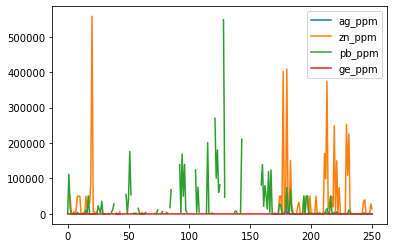

In [75]:
df_cmog_ppm_1.plot()

In [77]:
df_cmog_ppm_1.isna().sum()

ag_ppm    132
zn_ppm    132
pb_ppm     57
ge_ppm      0
dtype: int64

In [79]:
df_cmog_ppm_1 = df_cmog_ppm_1.dropna()
df_cmog_ppm_1.shape

(119, 4)

### TOO SMALL